# Intro

DATASETS:

https://www.kaggle.com/crawford/cat-dataset
https://www.microsoft.com/en-us/download/details.aspx?id=54765
https://github.com/Azure-Samples/cognitive-services-python-sdk-samples/tree/master/samples/vision/images
https://lionbridge.ai/datasets/20-best-image-datasets-for-computer-vision/

https://www.metamaven.com/chihuahua-vs-muffin-comparison-computer-vision-apis/
https://github.com/ieee8023/deep-learning-datasets


DOCU:
https://docs.microsoft.com/pl-pl/python/api/azure-cognitiveservices-vision-customvision/azure.cognitiveservices.vision.customvision.training.custom_vision_training_client.customvisiontrainingclient?view=azure-python#create-project-name--description-none--domain-id-none--classification-type-none--target-export-platforms-none--custom-headers-none--raw-false----operation-config-


https://www.microsoft.com/en-us/download/details.aspx?id=54765

https://www.wintellect.com/microsoft-custom-vision-creating-an-image-classification-model/


# Instal Custom Vision Python SDK

In [1]:
!pip install azure-cognitiveservices-vision-customvision

     |████████████████████████████████| 112kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 92kB 4.0MB/s eta 0:00:011
     |████████████████████████████████| 51kB 15.9MB/s eta 0:00:01
     |████████████████████████████████| 153kB 4.5MB/s eta 0:00:01


In [ ]:
import time
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set up Azure Cognitice Services credentials

In [81]:
# from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
# from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry

ENDPOINT = "https://marta1-prediction.cognitiveservices.azure.com/"

# Replace with a valid key
training_key = "0e5d838738c54d81b57fb5f38c0c7ae5"
prediction_key = "a2bfb905d489428cb5f53fcdcb1df96d"
prediction_resource_id = "/subscriptions/1ec71957-f4e7-4456-8e8f-2d33aa1d08eb/resourceGroups/DockerIntroductionRG/providers/Microsoft.CognitiveServices/accounts/Marta1-Prediction"

publish_iteration_name = "classifyModel"

trainer = CustomVisionTrainingClient(training_key, endpoint=ENDPOINT)

# Create a new project
print ("Creating project...")
project = trainer.create_project("Feline Emotions")

# Possible parameters for creating method create_project
# https://docs.microsoft.com/pl-pl/python/api/azure-cognitiveservices-vision-customvision/azure.cognitiveservices.vision.customvision.training.custom_vision_training_client.customvisiontrainingclient?view=azure-python#create-project-name--description-none--domain-id-none--classification-type-none--target-export-platforms-none--custom-headers-none--raw-false----operation-config-

Creating project...


# Create Tags (Labels)

In [82]:
# Make two tags in the new project
angry_tag = trainer.create_tag(project.id, "Angry")
happy_tag = trainer.create_tag(project.id, "Happy")

# Upload images for training

## Upload Angry Cats (40 images)

In [83]:
### This code uploads each image with its corresponding tag. You can upload up to 64 images in a single batch.

base_image_url = "/Users/doma022/Desktop/AI_Workshop/CATS/"

print("Adding images...")

image_list = []

for image_num in range(1, 40):
    file_name = "angry_{}.jpg".format(image_num)
    with open(base_image_url + "Angry_Cat/" + file_name, "rb") as image_contents:
        image_list.append(ImageFileCreateEntry(name=file_name,
                                               contents=image_contents.read(),
                                               tag_ids=[angry_tag.id]))

upload_result = trainer.create_images_from_files(project.id, images=image_list)

if not upload_result.is_batch_successful:
    print("Image batch upload failed.")
    for image in upload_result.images:
        print("Image status: ", image.status)
    exit(-1)

Adding images...


## Upload Happy Cats (40 images)

In [84]:
### This code uploads each image with its corresponding tag. You can upload up to 64 images in a single batch.

base_image_url = "/Users/doma022/Desktop/AI_Workshop/CATS/"

print("Adding images...")

image_list = []


for image_num in range(1, 40):
    file_name = "happy_{}.jpg".format(image_num)
    with open(base_image_url + "Happy_Cat/" + file_name, "rb") as image_contents:
        image_list.append(ImageFileCreateEntry(name=file_name,
                                               contents=image_contents.read(),
                                               tag_ids=[happy_tag.id]))

upload_result = trainer.create_images_from_files(project.id, images=image_list)

if not upload_result.is_batch_successful:
    print("Image batch upload failed.")
    for image in upload_result.images:
        print("Image status: ", image.status)
    exit(-1)

Adding images...


# Train the classifier and publish

In [85]:
#import time

print ("Training...")
iteration = trainer.train_project(project.id)

while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Publish it to the project endpoint
trainer.publish_iteration(project.id, iteration.id, publish_iteration_name, prediction_resource_id)
print ("Done!")

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed
Done!


# Get performance measures

In [86]:
#https://docs.microsoft.com/bs-latn-ba/rest/api/cognitiveservices/customvisiontraining/getiterationperformance/getiterationperformance

# Precision = TP / (TP + FP)
# Recall (sensitivity) = TP / (TP + TN)

performance = trainer.get_iteration_performance(project.id, iteration.id)
print("Overall Precision: {0:<10}".format(performance.precision))
print("Overall Recall:    {0:<10}".format(performance.recall))

Overall Precision: 0.7692308 
Overall Recall:    0.625     


# Get and use the published iteration on the prediction endpoint

Populating the interactive namespace from numpy and matplotlib
test_1.jpg
	Angry: 55.14%
	Happy: 15.81%


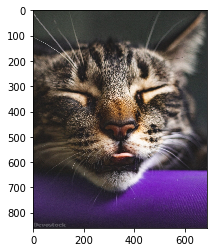

test_2.jpg
	Happy: 36.70%
	Angry: 14.63%


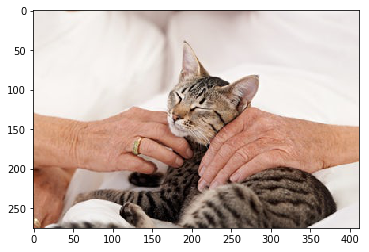

test_3.jpg
	Angry: 97.82%
	Happy: 3.95%


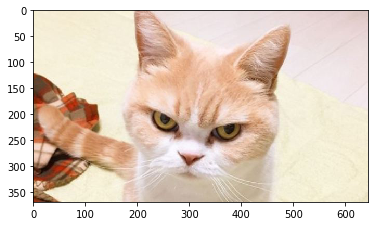

test_4.jpg
	Angry: 98.95%
	Happy: 0.04%


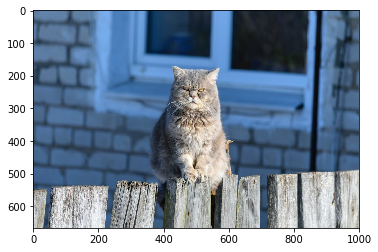

test_5.jpg
	Angry: 86.69%
	Happy: 12.86%


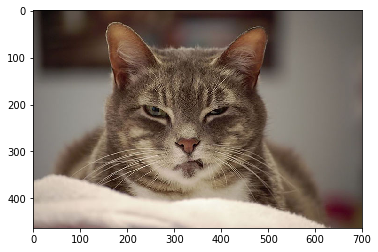

test_6.jpg
	Angry: 98.47%
	Happy: 9.51%


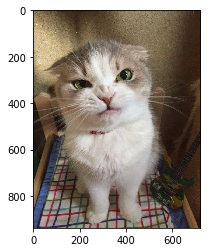

test_7.jpg
	Angry: 98.72%
	Happy: 2.09%


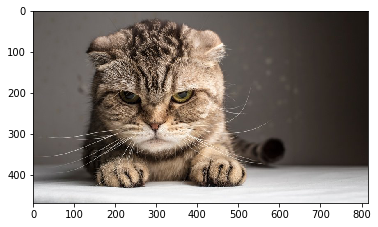

test_8.jpg
	Angry: 66.24%
	Happy: 12.34%


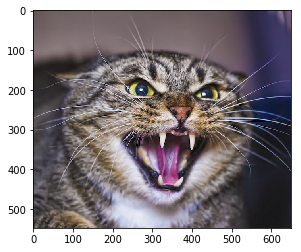

test_9.jpg
	Angry: 99.20%
	Happy: 0.26%


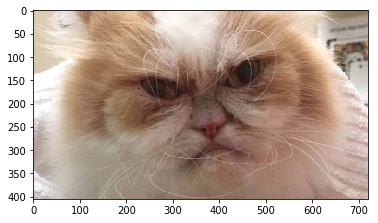

test_10.jpg
	Angry: 80.00%
	Happy: 0.14%


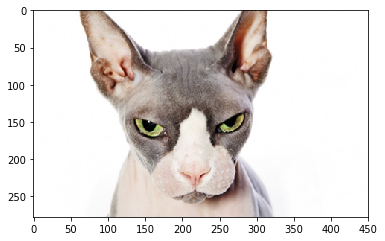

test_11.jpg
	Happy: 97.23%
	Angry: 18.28%


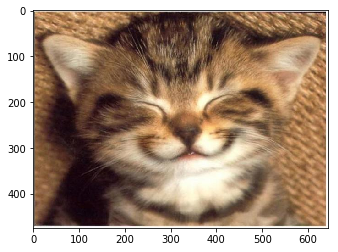

test_12.jpg
	Happy: 93.60%
	Angry: 18.28%


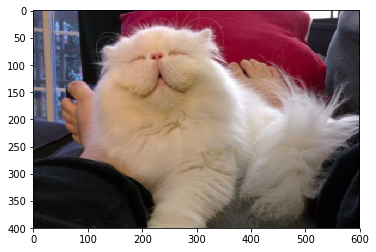

test_13.jpg
	Happy: 74.93%
	Angry: 1.37%


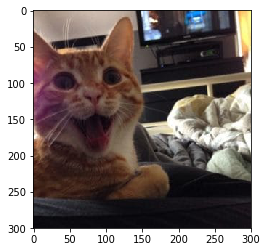

test_14.jpg
	Happy: 95.52%
	Angry: 1.21%


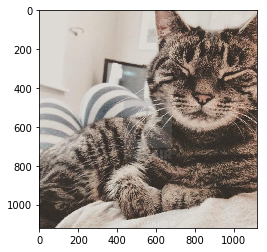

In [46]:
#from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg


# Now there is a trained endpoint that can be used to make a prediction
predictor = CustomVisionPredictionClient(prediction_key, endpoint=ENDPOINT)


for image_num in range(1, 15):
    file_name = base_image_url + "TEST/" + "test_{}.jpg".format(image_num)

    with open(file_name, "rb") as image_contents:
        results = predictor.classify_image(
            project.id, publish_iteration_name, image_contents.read())

        print("==============================================")
        
        print("test_{}.jpg".format(image_num))
        # Display the results.
        for prediction in results.predictions:
            print("\t" + prediction.tag_name +
                  ": {0:.2f}%".format(prediction.probability * 100))
            
            
        
        img=mpimg.imread(file_name)
        imgplot = plt.imshow(img)
        plt.show()
        